In [134]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [135]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as pyplot
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import mean_squared_error

# Generate Data

In [136]:
torch.manual_seed(0)

In [137]:
X = torch.linspace(-3, 3, 100).reshape(-1,1)
y = X.pow(3) + 0.5 * torch.randn(X.size())

In [138]:
print("X shape: ", X.shape)
print("y shape: ", y.shape)

X shape:  torch.Size([100, 1])
y shape:  torch.Size([100, 1])


In [139]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 2)

In [140]:
print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)
print("y_train Shape: ", y_train.shape)
print("y_test Shape: ", y_test.shape)

X_train Shape:  torch.Size([80, 1])
X_test Shape:  torch.Size([20, 1])
y_train Shape:  torch.Size([80, 1])
y_test Shape:  torch.Size([20, 1])


In [141]:
class DropoutReg(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(X_train.shape[1], 32)
        self.l2 = nn.Linear(32,16)
        self.l3 = nn.Linear(16,1)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        x = self.relu(self.l1(x))
        x = self.relu(self.l2(x))
        x = self.l3(x)
        
        return x
    
model_without_dropout = DropoutReg()
        

In [142]:
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model_without_dropout.parameters(), lr = 0.01)

Epoch [1/100] Train Loss: 100.5113, Test Loss: 167.6209
Epoch [2/100] Train Loss: 97.6419, Test Loss: 164.2031
Epoch [3/100] Train Loss: 95.0657, Test Loss: 160.9710
Epoch [4/100] Train Loss: 92.6266, Test Loss: 157.8022
Epoch [5/100] Train Loss: 90.2846, Test Loss: 154.5766
Epoch [6/100] Train Loss: 87.9128, Test Loss: 151.4618
Epoch [7/100] Train Loss: 85.5950, Test Loss: 148.2281
Epoch [8/100] Train Loss: 83.2701, Test Loss: 144.6563
Epoch [9/100] Train Loss: 80.7412, Test Loss: 140.8461
Epoch [10/100] Train Loss: 78.0121, Test Loss: 136.8762
Epoch [11/100] Train Loss: 75.1715, Test Loss: 132.5654
Epoch [12/100] Train Loss: 72.1192, Test Loss: 127.8815
Epoch [13/100] Train Loss: 68.8457, Test Loss: 122.8265
Epoch [14/100] Train Loss: 65.3612, Test Loss: 117.4155
Epoch [15/100] Train Loss: 61.6841, Test Loss: 111.6635
Epoch [16/100] Train Loss: 57.8397, Test Loss: 105.6014
Epoch [17/100] Train Loss: 53.8576, Test Loss: 99.2749
Epoch [18/100] Train Loss: 49.7806, Test Loss: 92.7469
Ep

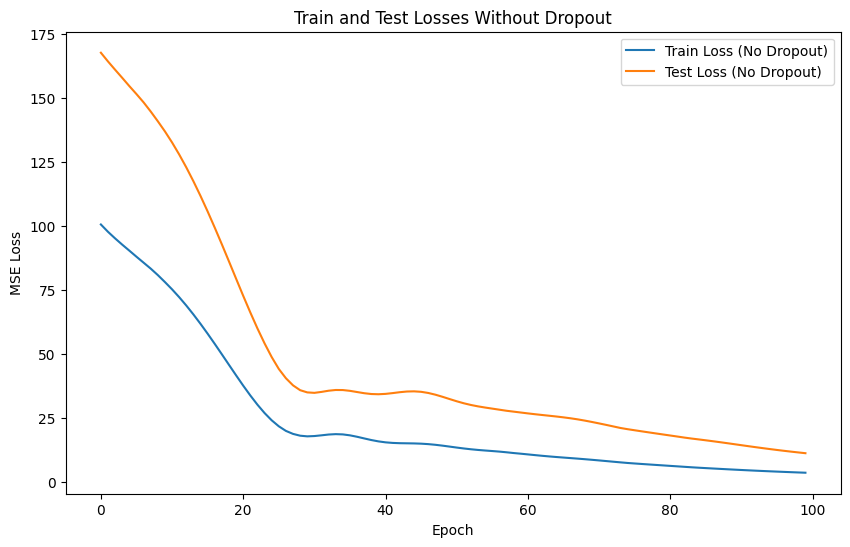

In [143]:
epochs = 100
train_losses = []
test_losses = []

for i in range(epochs):
    model_without_dropout.train()
    y_pred = model_without_dropout(X_train)
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Store the train loss
    train_losses.append(loss.item())
    
    model_without_dropout.eval()
    with torch.no_grad():
        y_test_pred = model_without_dropout(X_test)
        test_loss = loss_fn(y_test_pred, y_test)
        
        # Store the test loss
        test_losses.append(test_loss.item())

    print(f"Epoch [{i+1}/{epochs}] Train Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}")

# Plotting the losses after training
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Train Loss (No Dropout)')
plt.plot(test_losses, label='Test Loss (No Dropout)')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.title('Train and Test Losses Without Dropout')
plt.show()

In [144]:
class DropoutReg(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(X_train.shape[1], 32)
        self.l2 = nn.Linear(32,16)
        self.l3 = nn.Linear(16,1)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)
        
    def forward(self, x):
        x = self.relu(self.l1(x))
        x = self.dropout(x)
        x = self.relu(self.l2(x))
        x = self.dropout(x)
        x = self.l3(x)
        
        return x
    
model_with_dropout = DropoutReg()
        

In [145]:
optimizer = optim.Adam(model_with_dropout.parameters(), lr=0.01)

Epoch [1/100] Train Loss: 99.8573, Test Loss: 164.9486
Epoch [2/100] Train Loss: 96.5287, Test Loss: 161.9229
Epoch [3/100] Train Loss: 94.6220, Test Loss: 159.0461
Epoch [4/100] Train Loss: 91.5470, Test Loss: 156.1358
Epoch [5/100] Train Loss: 90.4862, Test Loss: 152.9317
Epoch [6/100] Train Loss: 87.8412, Test Loss: 149.3509
Epoch [7/100] Train Loss: 85.8095, Test Loss: 145.3850
Epoch [8/100] Train Loss: 84.2139, Test Loss: 140.9977
Epoch [9/100] Train Loss: 79.9684, Test Loss: 136.1765
Epoch [10/100] Train Loss: 76.6930, Test Loss: 130.9016
Epoch [11/100] Train Loss: 71.8283, Test Loss: 125.0384
Epoch [12/100] Train Loss: 67.6034, Test Loss: 118.5506
Epoch [13/100] Train Loss: 64.0240, Test Loss: 111.5632
Epoch [14/100] Train Loss: 64.8601, Test Loss: 104.2174
Epoch [15/100] Train Loss: 54.0239, Test Loss: 96.5343
Epoch [16/100] Train Loss: 50.4972, Test Loss: 88.5751
Epoch [17/100] Train Loss: 44.9076, Test Loss: 80.3852
Epoch [18/100] Train Loss: 53.0383, Test Loss: 72.3148
Epoch

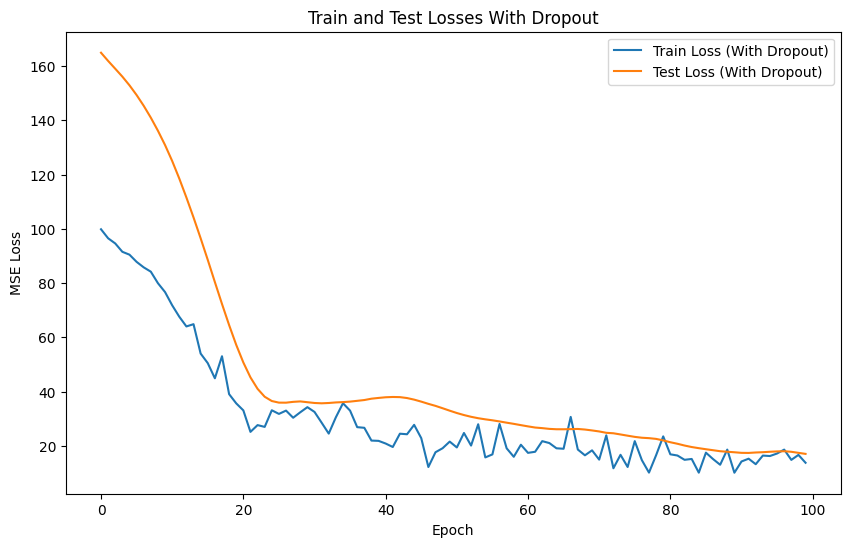

In [146]:
epochs = 100
train_losses = []
test_losses = []

for i in range(epochs):
    model_with_dropout.train()
    y_pred = model_with_dropout(X_train)
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Store the train loss
    train_losses.append(loss.item())
    
    model_with_dropout.eval()
    with torch.no_grad():
        y_test_pred = model_with_dropout(X_test)
        test_loss = loss_fn(y_test_pred, y_test)
        
        # Store the test loss
        test_losses.append(test_loss.item())

    print(f"Epoch [{i+1}/{epochs}] Train Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}")

# Plotting the losses after training
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Train Loss (With Dropout)')
plt.plot(test_losses, label='Test Loss (With Dropout)')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.title('Train and Test Losses With Dropout')
plt.show()

### The model with dropout appears to be better in terms of generalization. Although its training loss is slightly higher and more erratic, the smaller gap between training and test losses suggests that it is less overfitted and likely to perform better on unseen data.

### Therefore, the model with dropout is likely the better model based on the given graphs.